In [1]:
# 数据表示与特征工程
# 我们一直假设数据是由浮点数组成的二维数组，其中每一列是描述数据点的连续特征，
# 而现实中数据并不是这样，一种常见特征类型就是分类特征，也叫离散特征，通常不是数值且无序
# 无论哪种类型的数据，数据表示方式都会对机器学习模型的性能产生巨大影响
# 如何找到最佳的数据表示，这个问题被称为特征工程

In [10]:
# 分类变量的处理
# One-Hot编码(虚拟变量)，是表示分类变量最常用的方法，也叫N取一编码或虚拟变量，背后思想是
# 将一个分类变量替换为一个或多个新特征，新特征取值为0和1，对于线性二分类的公式0和1有意义
# 将数据转换为分类变量的one-hot编码有两种方法：pandas或者scikit-learn
import pandas as pd
from IPython.display import display

data = pd.read_csv("C:\\Users\\su\\ml_codes\\data\\adult.data", 
                   header=None, index_col=False,
        names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
         'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
        'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 
           'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [12]:
# 检查字符串编码的分类数据，pandas的Series的value_counts函数现实唯一值及其出现的次数
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [14]:
# 使用pandas的get_dummies函数对数据进行one-hot编码转换
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n"), list(data_dummies.columns)

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:



(None,
 ['age',
  'hours-per-week',
  'workclass_ ?',
  'workclass_ Federal-gov',
  'workclass_ Local-gov',
  'workclass_ Never-worked',
  'workclass_ Private',
  'workclass_ Self-emp-inc',
  'workclass_ Self-emp-not-inc',
  'workclass_ State-gov',
  'workclass_ Without-pay',
  'education_ 10th',
  'education_ 11th',
  'education_ 12th',
  'education_ 1st-4th',
  'education_ 5th-6th',
  'education_ 7th-8th',
  'education_ 9th',
  'education_ Assoc-acdm',
  'education_ Assoc-voc',
  'education_ Bachelors',
  'education_ Doctorate',
  'education_ HS-grad',
  'education_ Masters',
  'education_ Preschool',
  'education_ Prof-school',
  'education_ Some-college',
  'gender_ Female',
  'gender_ Male',
  'occupation_ ?',
  'occupation_ Adm-clerical',
  'occupation_ Armed-Forces',
  'occupation_ Craft-repair',
  'occupation_ Exec-managerial',
  'occupation_ Farming-fishing',
  'occupation_ Handlers-cleaners',
  'occupation_ Machine-op-inspct',
  'occupation_ Other-service',
  'occupation_ Pri

In [15]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
# 可以使用DataFrame的values属性将数据转换为numpy数组
# 在索引切片的时候注意：numpy数组的切片范围不包括结尾，pandas的列索引范围包括结尾
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape:{}  y.shape:{}".format(X.shape, y.shape))

X.shape:(32561, 44)  y.shape:(32561,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("Test score:{:.2f}".format(logreg.score(X_test, y_test)))

Test score:0.81


In [24]:
# 对同时包含训练数据和测试数据的DataFrame调用get_dummies确保分类变量的表示方式相同

In [25]:
# 数字可以编码分类变量
# 分类特征通常用整数进行编码，它们是数字并不意味着它们必须被视为连续特征，也可能是分散的
# get_dummied函数将所有数字看作是连续的，不会为其创建虚拟变量，可使用scikit-learn的
# OneHotEncoder指定哪些变量是连续的、离散的，也可将DataFrame中的数值列转为字符串再转换

In [26]:
demo_df = pd.DataFrame({'Integer Feature':[0,1,2,1],
                       'Categorical Feature':['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


In [28]:
pd.get_dummies(demo_df) # get_dummies函数只编码字符串特征，不会改变整数特征

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [30]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df)

,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks,Integer Feature_0,Integer Feature_1,Integer Feature_2
0,0,0,1,1,0,0
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,1,0,0,0,1,0


In [32]:
# 分箱、离散化、线性模型与树
# 数据表示的最佳方法不仅取决于数据的语义，还取决于所使用的模型种类

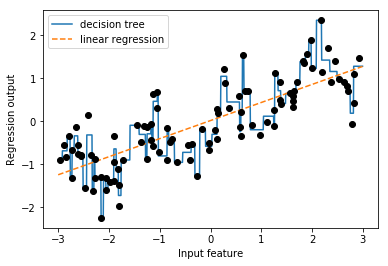

In [38]:
# 在wave数据集上比较线性回归和决策树
import numpy as np
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="linear regression",)
plt.plot(X[:,0],y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [39]:
# 如图，线性模型只能对线性关系建模，对于单个特征的情况就是直线，决策树可以构建
# 更为复杂的数据类型，但这强烈依赖于数据表示。有一种方法可以让线性模型在连续数据上
# 变得更加强大，就是使用特征分箱(也叫离散化)，即将其划分为多个特征

In [40]:
# 将特征的输入范围划分成固定个数的箱子
bins = np.linspace(-3, 3, 11)
print("bins:{}".format(bins))

bins:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [41]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [42]:
# 使用OneHotEncoder将离散特征转换为one-hot编码，目前只适用于值为证书的分类变量
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [45]:
print("X_binned.shape:{}".format(X_binned.shape))

X_binned.shape:(100, 10)


Text(0.5, 0, 'Input feature')

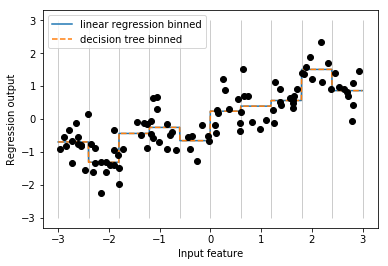

In [50]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [51]:
# 分箱特征让线性模型更加灵活，但对基于树的模型通常不会产生更好的效果

In [56]:
# 交互特征与多项式特征，是丰富特征表示的另一种方法，对线性模型很有效

In [57]:
# 在分箱特征中加入原始特征，使线性模型学习斜率
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


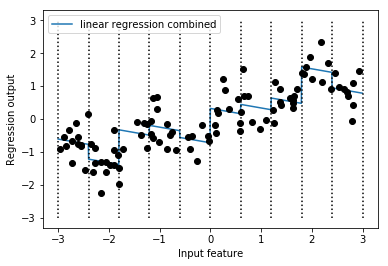

In [62]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="upper left")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [63]:
# 在分箱特征中加入交互特征(乘积特征),使每个箱子都有自己的斜率
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(100, 20)


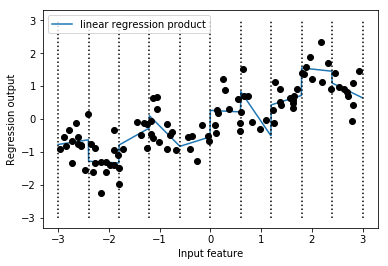

In [66]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="upper left")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In [67]:
# 使用分箱是扩展连续特征的一种方法，还可以使用原始特征的多项式,x ** 2、x ** 3 ......
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("X_poly.shape:{}".format(X_poly.shape))

X_poly.shape:(100, 10)


In [68]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [70]:
# 调用get_feature_names()方法查看特征的语义
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


Text(0.5, 0, 'Input feature')

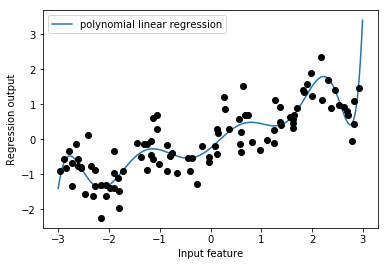

In [71]:
# 将多项式特征和线性回归一起使用，可以得到经典的多项式回归
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:,0], y, 'o', c='k')
plt.legend(loc="upper left")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

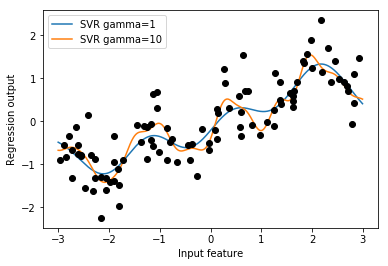

In [73]:
# 原始数据上核SVM模型学习结果
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [74]:
# 使用核SVM模型我们能到了一个与多项式回归类似的预测结果，且不需要进行显式的特征变换

In [75]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                   random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [78]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:{}".format(X_train.shape))
print("X_train_poly.shape:{}".format(X_train_poly.shape))

X_train.shape:(379, 13)
X_train_poly.shape:(379, 105)


In [81]:
# 原始特征从13个扩展到105个，这些新特征表示两个不同原始特征之间所有可能的交互项
# 以及每个原始特征的平方和
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [82]:
# 对Ridge在有交互特征数据和原始数据上的性能进行对比
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions:{:.3f}".format(ridge.score(X_test_scaled,
                                                    y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions:{:.3f}".format(ridge.score(X_test_poly,
                                                    y_test)))

Score without interactions:0.577
Score with interactions:0.741


In [88]:
# 随机森林对比
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions:{:.3f}".format(rf.score(X_test_scaled, 
                                                          y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions:{:.3f}".format(rf.score(X_test_poly, 
                                                          y_test)))

Score without interactions:0.809
Score with interactions:0.766


In [84]:
# 即使没有额外的特征，随机森林的性能也要优于idge，添加交互特征和多项式特征反而降低其性能

In [92]:
# 单变量非线性转换
# 大部分模型都在每个特征(回归问题中还包括目标值)大致遵循高斯分布是表现最好，也就是
# 每个特征的直方图应该具有类似“钟形曲线”的形状

In [93]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [104]:
# 特征看起来没有什么规律，尝试观察每个数值出现的次数,bincount始终从0开始统计每个次数
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


(0, 147.44)

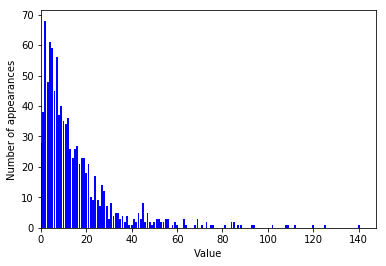

In [125]:
# 查看X[:,0]特征取值的直方图
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.xlim(0,)

In [126]:
# 尝试拟合岭回归
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = Ridge()
reg.fit(X_train, y_train)
print("Test score:{:.3f}".format(reg.score(X_test, y_test)))

Test score:0.622


(0, 5.035580072876578)

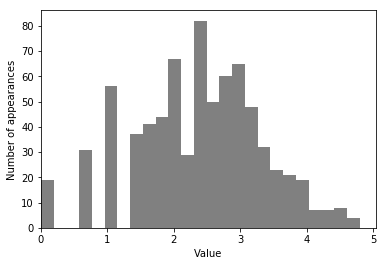

In [133]:
# 尝试对数变换，因为0没有对数，所以使用log(X+1)
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")
plt.xlim(0, )

In [135]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score:{:.3f}".format(score))

Test score:0.875


In [136]:
# 为数据集和模型的所有组合寻找最佳变换是很复杂的，通常只有一部分特征应该进行变换，
# 有时每个特征的变换方式也各不相同，对回归的目标变量y进行变换有时也是一个很好的主意

In [137]:
# 自动化特征选择
# 添加更多的特征会使所有模型变得更加复杂，从而增大过拟合的可能性，在添加新特征
# 或处理一般的高维数据集时，最好将特征数据减少到只包含最有用的那些特征，并删除其它特征
# 三种基本策略：单变量统计、基于模型的选择、迭代选择，都是监督方法，并只在训练集拟合特征

In [140]:
# 单变量统计，计算每个特征和目标值之间是否存在统计显著性，选择具有最高置信度的特征
# 分类问题也称为方差分析，这些测试的一个关键性质就是它们是单变量的，即只单独考虑每个特征
# scikit-learn中单变量特征选择测试分类问题常用f_classif，回归问题常用f_regression，
# 然后基于测试中确定的p值来选择一种舍弃特征的方法，舍弃参数的方法都是用阈值来
# 舍弃所有p值过大的特征，计算阈值最简单的两种方法：SelectKBest和SelectPercentile
# SelectKBest选择固定数量的k个特征，SelectPercentile选择固定百分比的特征

In [142]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
# 向数据中添加噪声
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target,
                                                   random_state=0, test_size=.5)
# percentile参数设置百分比
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
print("X_train.shape:{}".format(X_train.shape))
print("X_train_selected.shape:{}".format(X_train_selected.shape))

X_train.shape:(284, 80)
X_train_selected.shape:(284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

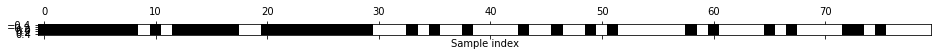

In [146]:
# 可以使用get_support()方法查看那些特征被选中，它返回所选特征的不耳遮罩(mask)
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [148]:
# 可以看出大多数选择的特征都是原始特征,并且大多数噪声特征被删除

In [162]:
# 在逻辑回归模型上比较所有特征和选择特征的性能
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
print("Score with all features:{:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features:{:.3f}".format(
                                lr.score(X_test_selected, y_test)))

Score with all features:0.930
Score with only selected features:0.940


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

In [165]:
# 基于模型的特征选择，使用一个监督学习模型来判断每个特征的重要性，并且仅保留最重要的特征
# 用于特征选择的监督模型不需要与最终监督建模的模型相同，需要为每个特征提供某种重要性度量，
# 以便用这个度量对特征进行排序，决策树和基于决策树的模型提供了feature_importances_属性，
# 可以直接编码每个特征的重要性，线性模型系数的绝对值也可以用于表示特征的重要性
# 与单变量选择不同，基于模型的选择同时考虑所有特征，因此可以获取交互项(如果模型能够获取)
# 使用基于模型的特征选择，我们需要使用SelectFromModel变换器

In [167]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# 用包含100颗树的随机森林分类器来计算特征重要性，使用中位数作为阈值，可以得到一半的特征
select = SelectFromModel(RandomForestClassifier(n_estimators=100, 
                                    random_state=42), threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:{}".format(X_train.shape))
print("X_train_l1.shape:{}".format(X_train_l1.shape))

X_train.shape:(284, 80)
X_train_l1.shape:(284, 40)


Text(0.5, 0, 'Sample index')

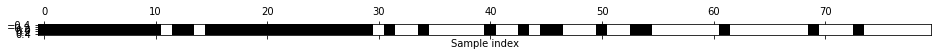

In [169]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [170]:
# 除了两个原始特征，其余原始特征都被选中，由于指定了40个特征，所以也选择了一些噪声特征

In [175]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=500).fit(X_train_l1, y_train).score(
                                        X_test_l1, y_test)
print("Test scoreL:{:.3f}".format(score))

Test scoreL:0.947


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [176]:
# 迭代特征选择，构建一系列模型，每个模型都使用不同数量的特征。有两种基本方法：
# 一是开始没有特征，然后逐个添加特征，直到满足某个终止条件
# 二是从所有特征开始，然后逐个删除特征，直到满足某个终止条件

Text(0.5, 0, 'Sample index')

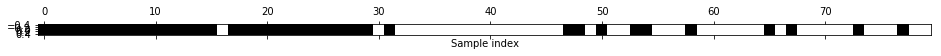

In [178]:
# 递归特征消除，保留40个特征
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
                        n_features_to_select=40)
select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [179]:
# 与单变量选择和基于模型的选择相比，迭代特征选择的结果更好

In [181]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression(max_iter=500).fit(X_train_rfe, y_train).score(
    X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.954


d:\pyenv\ml3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [1]:
# 在不确定何时选择使用那些特征作为机器学习的算法输入，自动化特征选择可能特别有用，它有助
# 于减少所需要的

In [2]:
# 利用专家知识，虽然在许多情况下，机器学习的目的是避免创建一组专家设计的规则，
# 但这并不意味着应该舍弃该应用的先验知识，通常来说领域专家可以帮助找出有用的特征

In [4]:
# Citi Bike自行车数据
%matplotlib inline
import mglearn
citibike = mglearn.datasets.load_citibike()
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

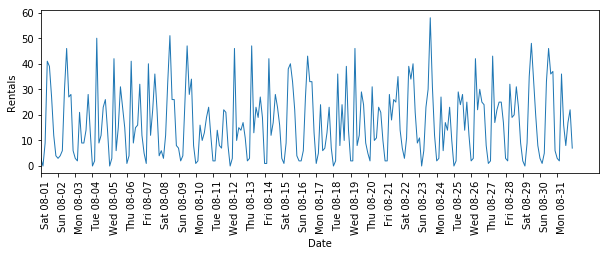

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                      freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlim(citibike.index.min(),)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [84]:
# 提取目标值（租车数量）
y = citibike.values
# 将时间转换为POSIX时间
X = citibike.index.astype("int").values.reshape(-1, 1)

In [90]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2:{:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
                  ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test)+n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--', 
                     label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

Test-set R^2:-0.04


<Figure size 432x288 with 0 Axes>

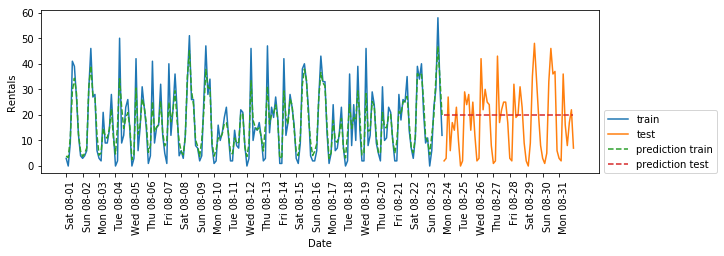

In [92]:
# 使用森林进行预测
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

In [93]:
# 在训练集上预测结果很好，但测试集预测结果是一条常数直线，R2为-0.04，说明什么都没有学到
# 因为测试集中POSIX时间特征的值超出了训练集中的特征取值范围，树以及随机森林无法外推

Test-set R^2:0.60


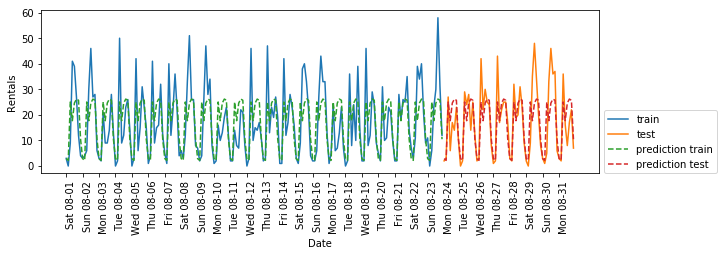

In [95]:
# 我们从POSIX时间中学不到任何东西，所以删除到这个特征，尝试使用“专家知识”特征：
# 一天内的时间、一周的星期几
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)


Test-set R^2:0.84


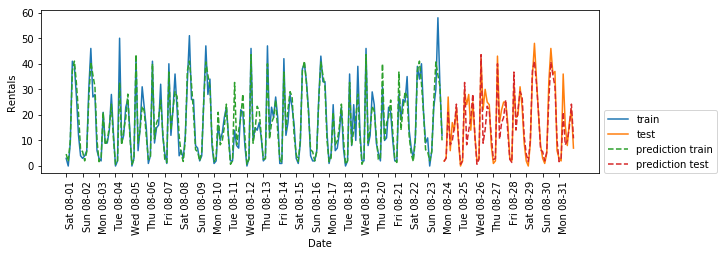

In [97]:
import numpy as np

X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                        citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2:0.13


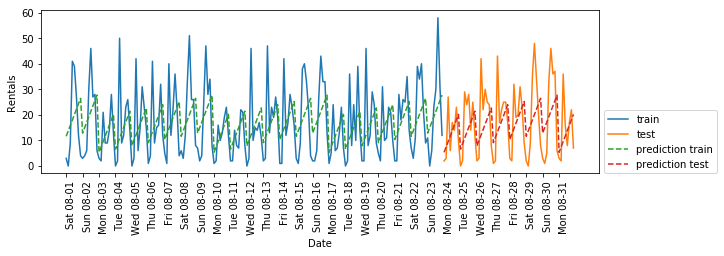

In [100]:
# 使用线性回归进行预测
from sklearn.linear_model import LinearRegression

eval_on_features(X_hour_week, y, LinearRegression())

In [99]:
# LinearRegression的效果差得多，而且周期性模式看起来很奇怪。其原因在于
# 我们用整数编码一周的星期几和一天内的时间，它们被解释为连续变量


Test-set R^2:0.62


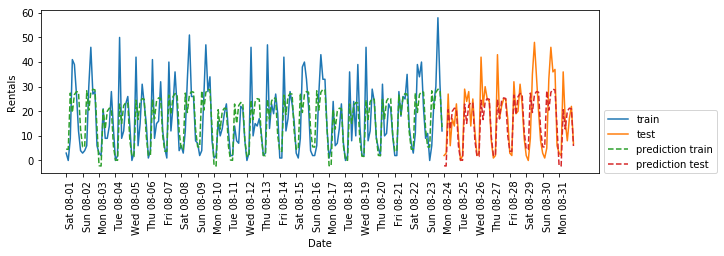

In [101]:
# 尝试将整数解释为分类变量进行学习
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, LinearRegression())

Test-set R^2:0.84


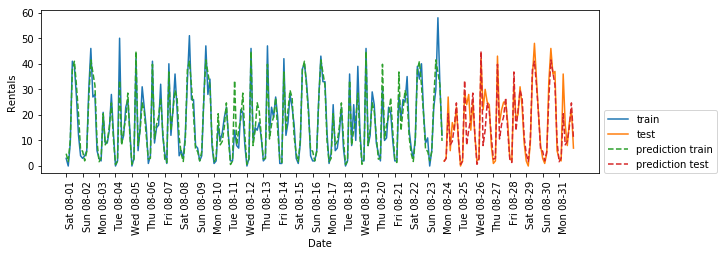

In [107]:
# 尝试利用交互项提升模型性能
from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, 
                                      include_bias=False)
X_hour_week_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = LinearRegression()
eval_on_features(X_hour_week_poly, y, lr)

Text(0, 0.5, 'Feature magnitude')

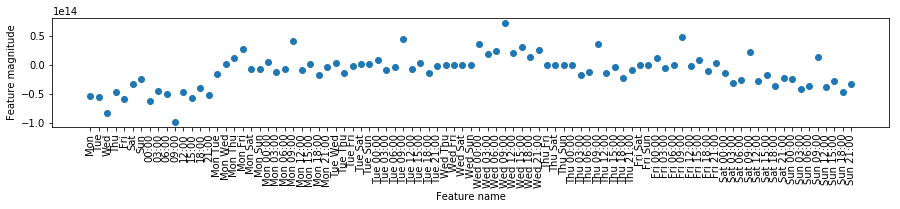

In [111]:
# 最终线性模型得到一个性能与随机森林类似的模型
# 对模型学到的系数可视化
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day+hour
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_!=0]
coef_nonzero = lr.coef_[lr.coef_!=0]
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")